# This notebook examines the effect of gene mutation on proteomic abundance in various proteins.
### Particularly, the effect of truncation mutation on proteomic abundance in the MSI subtype will be illustrated.

Here, we investigate the effect of gene mutation on proteomic abundance in ARID1A, RBM27, INPPL1, JAK1, CTNNB1, TP53, and CCND1. We are particularly interested in the presense of truncation mutations in the MSI subtype, and the effect they have on proteomic levels. Below, each protein is investigated individually. We do this by creating a dataframe containing that protein's abundance in each patient, and that patient's mutation status (i.e. missense mutation, nonsense mutation, etc.), as well as that patient's MSI status (i.e. MSI or MSS subtype). This dataframe is then reformatted, classifying nonsense, and frameshift mutations as truncation, and all other mutations as 'other mutation'. Finally, we plot the data in our data frame, effectively showing the protein levels in 6 categories: <br>
MSI Subtype - Wildtype <br>
MSI Subtype - Truncation Mutation<br>
MSI Subtype - Other Mutation<br>
MSS Subtype - Wildtype<br>
MSS Subtype - Truncation Mutation<br>
MSS Subtype - Other Mutation

##### Import necessary python packages, included the endometrial data in CPTAC.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import re
import seaborn as sns
import statsmodels.stats.multitest
import graphviz
import CPTAC.Endometrial as CPTAC
#from CPTAC import endometrial as en

Welcome to the CPTAC data service package. This import contains
information about the package. In order to access a specific data set,
import a CPTAC subfolder by either 'import CPTAC.DataName' or 'from
CPTAC import DataName'.
Loading Endometrial CPTAC data:
Loading Dictionary...
Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Mutation Data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but the data may not be in a
publication until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter embargo() to open the webpage for more details.


##### Get the relevant data from CPTAC, including proteomic data and clinical data (which outlines MSI vs MSS subtype)

In [38]:
'''Grab CPTAC Data'''
proteomics = CPTAC.get_proteomics()
clinical = CPTAC.get_clinical()

'''Look at MSI vs MSS type'''
msi_status = clinical['MSI_status']

# ARID1A

##### 1. Look at the ARID1A gene, and the effect of its mutation on ARID1A protein abundance. Use the CPTAC compare mutations method to see how ARID1A protein abundance is affected by ARID1A mutation. Also include MSI Status (whether or not they have MSI subtype) in data.

In [39]:
'''Specify the what gene and protein we're looking at'''
gene = 'ARID1A'
protein = 'ARID1A'

'''Use the compare mutations function to examine protein abundance when the gene is mutated'''
genedf = CPTAC.compare_mutations(proteomics, protein, gene)

'''Add the MSI_status column into our dataframe'''
genedf['MSI_status'] = msi_status

##### 2. Reformat the data to classify nonsense mutations, and frame shift insertions/deletions as truncation mutations. Classify all others as other mutation. Leave wildtype as is.

In [40]:
'''Classify mutations as either truncation or other mutation'''
genedf = genedf.replace({'Mutation': {'Frame_Shift_Del': 'Truncation',
                                      'Frame_Shift_Ins': 'Truncation',
                                      'Nonsense_Mutation': 'Truncation',
                                      'In_Frame_Del' : 'Other Mutation',
                                      'In_Frame_Ins' : 'Other Mutation',
                                      'Splice_Site' : 'Other Mutation',
                                      'Missense_Mutation': 'Other Mutation'
                                     }})

##### 3. Restrict our data to include only tumor patients, excluding non cancer patients

In [41]:
'''Look only at the tumor patients'''
genedf = genedf.loc[genedf['Patient_Type'] == 'Tumor']
genedf = genedf.sort_values(by=['Mutation', 'MSI_status'], ascending=False)

##### 4. Generate a plot illustrating proteomic levels of ARID1A in cases of truncation mutation, other mutation, and wildtype, for both MSI and MSS subtypes

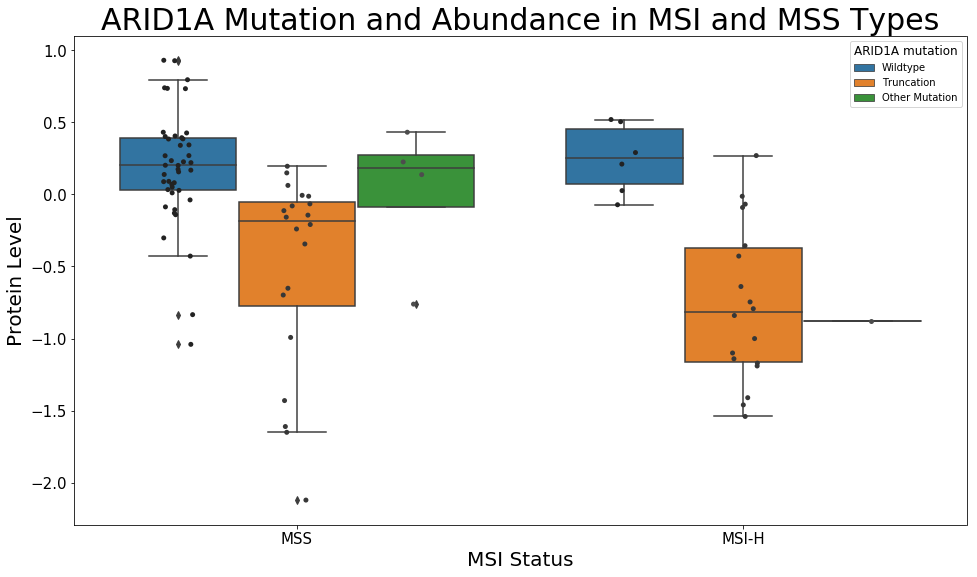

In [42]:
'''Format the data to generate a plot showing proteomic levels of truncation vs other mutation vs wildtype in MSI and MSS subtypes'''
a4_dims = (16, 9)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.boxplot(x="MSI_status", y=gene, hue="Mutation", data=genedf)
bx = sns.stripplot(data=genedf, x='MSI_status', y=gene, hue='Mutation', dodge=True, jitter=True, color='.3')
ax.tick_params(labelsize='15')
ax.set_xlabel('MSI Status', fontsize=20)
ax.set_ylabel('Protein Level',fontsize=20)
ax.set_title(gene + ' Mutation and Abundance in MSI and MSS Types', fontsize = 30)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:3],labels[0:3],title=gene + ' mutation', fontsize='10')
ax.get_legend().get_title().set_fontsize('12')

# RBM27

### NOTE: All of the following proteins were investigating following the exact same steps as outlined above.

##### Look at the RBM27 gene, and the effect of its mutation on RBM27 protein abundance. Use the CPTAC compare mutations method to see how RBM27 protein abundance is affected by RBM27 mutation. Also include MSI Status (whether or not they have MSI subtype) in data.

In [43]:
'''Specify the what gene and protein we're looking at'''
gene = 'RBM27'
protein = 'RBM27'

'''Use the compare mutations function to examine protein abundance when the gene is mutated'''
genedf = CPTAC.compare_mutations(proteomics, protein, gene)
genedf['MSI_status'] = msi_status

##### Reformat the data to classify nonsense mutations, and frame shift insertions/deletions as truncation mutations. Classify all others as other mutation. Leave wildtype as is.

In [44]:
'''Classify mutations as either truncation or other mutation'''
genedf = genedf.replace({'Mutation': {'Frame_Shift_Del': 'Truncation',
                                      'Frame_Shift_Ins': 'Truncation',
                                      'Nonsense_Mutation': 'Truncation',
                                      'Missense_Mutation': 'Other Mutation'
                                     }})

##### Restrict our data to include only tumor patients, excluding non cancer patients

In [45]:
'''Look only at the tumor patients'''
genedf = genedf.loc[genedf['Patient_Type'] == 'Tumor']
genedf = genedf.sort_values(by=['Mutation', 'MSI_status'], ascending=False)

##### Generate a plot illustrating proteomic levels of RBM27 in cases of truncation mutation, other mutation, and wildtype, for both MSI and MSS subtypes

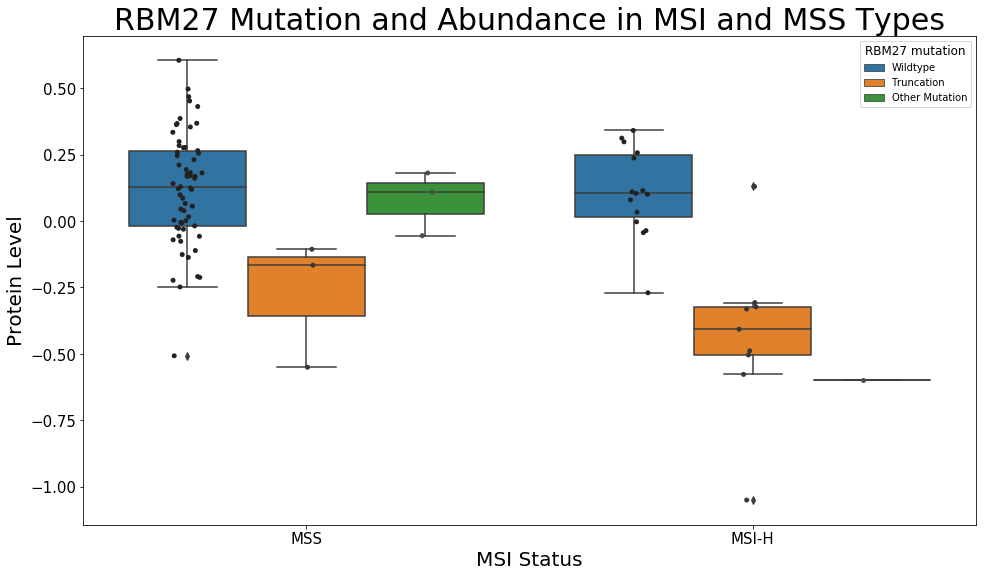

In [46]:
'''Format the data to generate a plot showing proteomic levels of truncation vs other mutation vs wildtype in MSI and MSS subtypes'''
a4_dims = (16, 9)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.boxplot(x="MSI_status", y=gene, hue="Mutation", data=genedf)
bx = sns.stripplot(data=genedf, x='MSI_status', y=gene, hue='Mutation', dodge=True, jitter=True, color='.3')
ax.tick_params(labelsize='15')
ax.set_xlabel('MSI Status', fontsize=20)
ax.set_ylabel('Protein Level',fontsize=20)
ax.set_title(gene + ' Mutation and Abundance in MSI and MSS Types', fontsize = 30)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:3],labels[0:3],title=gene + ' mutation', fontsize='10')
ax.get_legend().get_title().set_fontsize('12')

# INPPL1

##### Look at the INPPL1 gene, and the effect of its mutation on INPPL1 protein abundance. Use the CPTAC compare mutations method to see how INPPL1 protein abundance is affected by INPPL1 mutation. Also include MSI Status (whether or not they have MSI subtype) in data.

In [47]:
'''Specify the what gene and protein we're looking at'''
gene = 'INPPL1'
protein = 'INPPL1'

'''Use the compare mutations function to examine protein abundance when the gene is mutated'''
genedf = CPTAC.compare_mutations(proteomics, protein, gene)
genedf['MSI_status'] = msi_status

##### Reformat the data to classify nonsense mutations, and frame shift insertions/deletions as truncation mutations. Classify all others as other mutation. Leave wildtype as is.

In [48]:
'''Classify mutations as either truncation or other mutation'''
genedf = genedf.replace({'Mutation': {'Frame_Shift_Del': 'Truncation',
                                      'Frame_Shift_Ins': 'Truncation',
                                      'Nonsense_Mutation': 'Truncation',
                                      'Splice_Site': 'Other Mutation',
                                      'Missense_Mutation': 'Other Mutation'
                                     }})

##### Restrict our data to include only tumor patients, excluding non cancer patients

In [49]:
'''Look only at the tumor patients'''
genedf = genedf.loc[genedf['Patient_Type'] == 'Tumor']
genedf = genedf.sort_values(by=['Mutation', 'MSI_status'], ascending=False)

##### Generate a plot illustrating proteomic levels of INPPL1 in cases of truncation mutation, other mutation, and wildtype, for both MSI and MSS subtypes

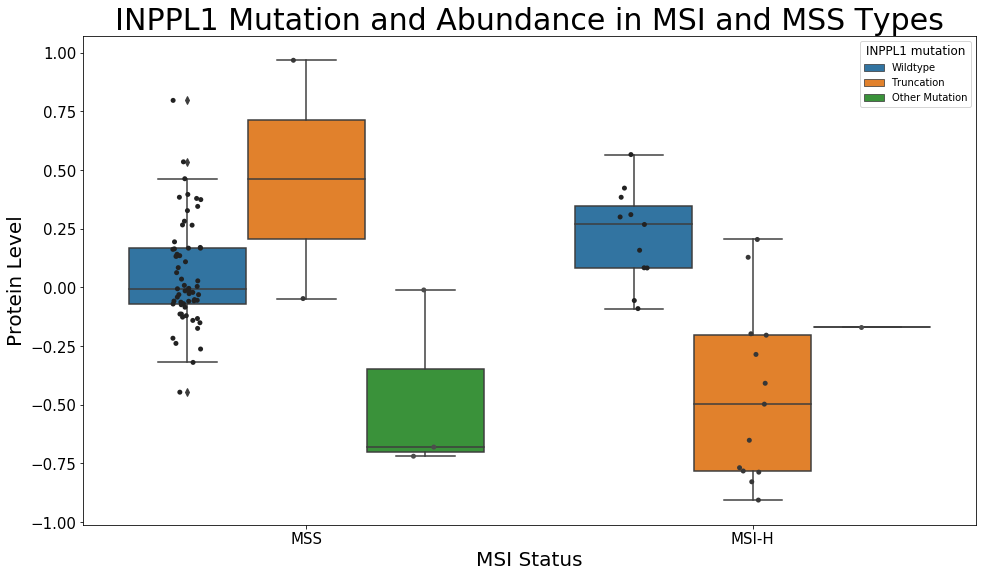

In [50]:
'''Format the data to generate a plot showing proteomic levels of truncation vs other mutation vs wildtype in MSI and MSS subtypes'''
a4_dims = (16, 9)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.boxplot(x="MSI_status", y=gene, hue="Mutation", data=genedf)
bx = sns.stripplot(data=genedf, x='MSI_status', y=gene, hue='Mutation', dodge=True, jitter=True, color='.3')
ax.tick_params(labelsize='15')
ax.set_xlabel('MSI Status', fontsize=20)
ax.set_ylabel('Protein Level',fontsize=20)
ax.set_title(gene + ' Mutation and Abundance in MSI and MSS Types', fontsize = 30)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:3],labels[0:3],title=gene + ' mutation', fontsize='10')
ax.get_legend().get_title().set_fontsize('12')

# JAK1

##### Look at the JAK1 gene, and the effect of its mutation on JAK1 protein abundance. Use the CPTAC compare mutations method to see how JAK1 protein abundance is affected by JAK1 mutation. Also include MSI Status (whether or not they have MSI subtype) in data.

In [51]:
'''Specify the what gene and protein we're looking at'''
gene = 'JAK1'
protein = 'JAK1'

'''Use the compare mutations function to examine protein abundance when the gene is mutated'''
genedf = CPTAC.compare_mutations(proteomics, protein, gene)
genedf['MSI_status'] = msi_status

##### Reformat the data to classify nonsense mutations, and frame shift insertions/deletions as truncation mutations. Classify all others as other mutation. Leave wildtype as is.

In [52]:
'''Classify mutations as either truncation or other mutation'''
genedf = genedf.replace({'Mutation': {'Frame_Shift_Del': 'Truncation',
                                      'Frame_Shift_Ins': 'Truncation',
                                      'Nonsense_Mutation': 'Truncation',
                                      'Missense_Mutation': 'Other Mutation',
                                      'Splice_Site': 'Other Mutation'
                                     }})

##### Restrict our data to include only tumor patients, excluding non cancer patients

In [53]:
'''Look only at the tumor patients'''
genedf = genedf.loc[genedf['Patient_Type'] == 'Tumor']
genedf = genedf.sort_values(by=['Mutation', 'MSI_status'], ascending=False)

##### Generate a plot illustrating proteomic levels of JAK1 in cases of truncation mutation, other mutation, and wildtype, for both MSI and MSS subtypes

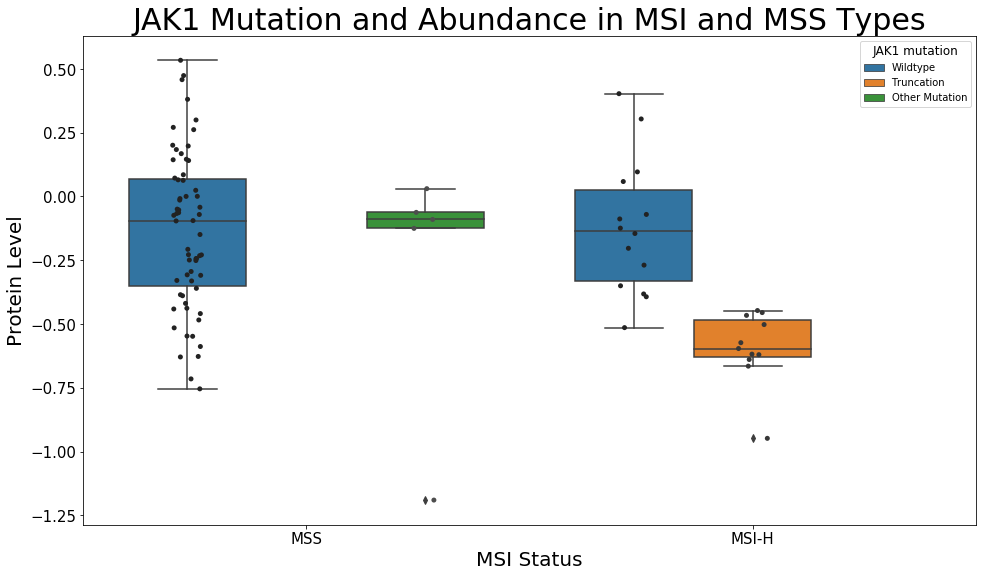

In [54]:
'''Format the data to generate a plot showing proteomic levels of truncation vs other mutation vs wildtype in MSI and MSS subtypes'''
a4_dims = (16, 9)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.boxplot(x="MSI_status", y=gene, hue="Mutation", data=genedf)
bx = sns.stripplot(data=genedf, x='MSI_status', y=gene, hue='Mutation', dodge=True, jitter=True, color='.3')
ax.tick_params(labelsize='15')
ax.set_xlabel('MSI Status', fontsize=20)
ax.set_ylabel('Protein Level',fontsize=20)
ax.set_title(gene + ' Mutation and Abundance in MSI and MSS Types', fontsize = 30)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:3],labels[0:3],title=gene + ' mutation', fontsize='10')
ax.get_legend().get_title().set_fontsize('12')

# CTNNB1

##### Look at the CTNNB1 gene, and the effect of its mutation on CTNNB1 protein abundance. Use the CPTAC compare mutations method to see how CTNNB1 protein abundance is affected by CTNNB1 mutation. Also include MSI Status (whether or not they have MSI subtype) in data.

In [55]:
'''Specify the what gene and protein we're looking at'''
gene = 'CTNNB1'
protein = 'CTNNB1'

'''Use the compare mutations function to examine protein abundance when the gene is mutated'''
genedf = CPTAC.compare_mutations(proteomics, protein, gene)
genedf['MSI_status'] = msi_status

##### Reformat the data to classify nonsense mutations, and frame shift insertions/deletions as truncation mutations. Classify all others as other mutation. Leave wildtype as is.

In [56]:
'''Classify mutations as either truncation or other mutation'''
genedf = genedf.replace({'Mutation': {'Frame_Shift_Del': 'Truncation',
                                      'Frame_Shift_Ins': 'Truncation',
                                      'Nonsense_Mutation': 'Truncation',
                                      'Missense_Mutation': 'Other Mutation',
                                      'In_Frame_Del' : 'Other Mutation'
                                     }})

##### Restrict our data to include only tumor patients, excluding non cancer patients

In [66]:
'''Look only at the tumor patients'''
genedf = genedf.loc[genedf['Patient_Type'] == 'Tumor']
genedf.loc[999] = [np.nan, 'Truncation', 'Tumor', 'MSS']
genedf = genedf.sort_values(by=['Mutation', 'MSI_status'], ascending=False)

##### Generate a plot illustrating proteomic levels of CTNNB1 in cases of truncation mutation, other mutation, and wildtype, for both MSI and MSS subtypes

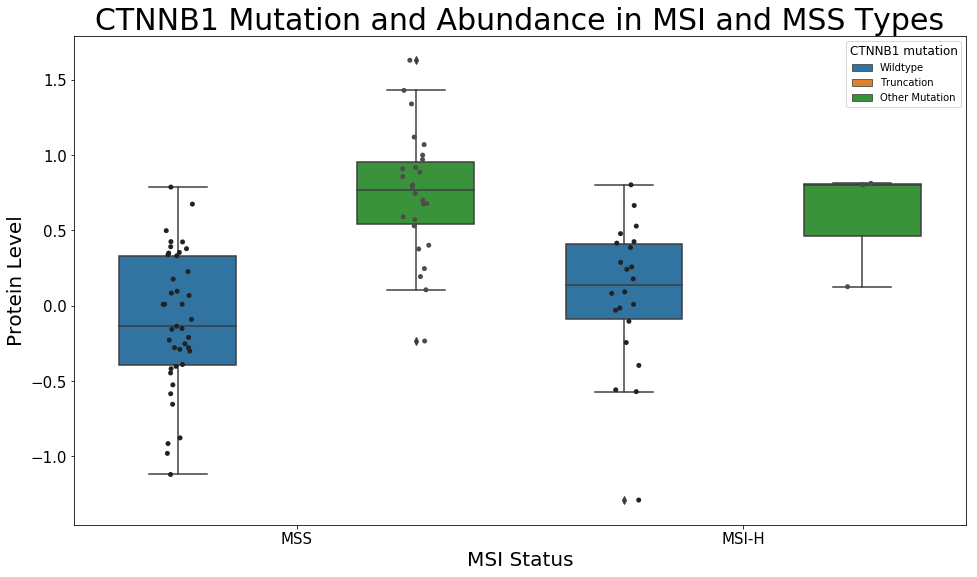

In [67]:
'''Format the data to generate a plot showing proteomic levels of truncation vs other mutation vs wildtype in MSI and MSS subtypes'''
a4_dims = (16, 9)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.boxplot(x="MSI_status", y=gene, hue="Mutation", data=genedf)
bx = sns.stripplot(data=genedf, x='MSI_status', y=gene, hue='Mutation', dodge=True, jitter=True, color='.3')
ax.tick_params(labelsize='15')
ax.set_xlabel('MSI Status', fontsize=20)
ax.set_ylabel('Protein Level',fontsize=20)
ax.set_title(gene + ' Mutation and Abundance in MSI and MSS Types', fontsize = 30)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:3],labels[0:3],title=gene + ' mutation', fontsize='10')
ax.get_legend().get_title().set_fontsize('12')

# TP53

##### Look at the TP53 gene, and the effect of its mutation on TP53 protein abundance. Use the CPTAC compare mutations method to see how TP53 protein abundance is affected by TP53 mutation. Also include MSI Status (whether or not they have MSI subtype) in data.

In [76]:
'''Specify the what gene and protein we're looking at'''
gene = 'TP53'
protein = 'TP53'

'''Use the compare mutations function to examine protein abundance when the gene is mutated'''
genedf = CPTAC.compare_mutations(proteomics, protein, gene)
genedf['MSI_status'] = msi_status

##### Reformat the data to classify nonsense mutations, and frame shift insertions/deletions as truncation mutations. Classify all others as other mutation. Leave wildtype as is.

In [77]:
'''Classify mutations as either truncation or other mutation'''
genedf = genedf.replace({'Mutation': {'Frame_Shift_Del': 'Truncation',
                                      'Frame_Shift_Ins': 'Truncation',
                                      'Nonsense_Mutation': 'Truncation',
                                      'Missense_Mutation': 'Other Mutation',
                                      'In_Frame_Del':'Other Mutation',
                                      'Splice_Site':'Other Mutation'
                                     }})

##### Restrict our data to include only tumor patients, excluding non cancer patients

In [78]:
'''Look only at the tumor patients'''
genedf = genedf.loc[genedf['Patient_Type'] == 'Tumor']
genedf = genedf.sort_values(by=['Mutation','MSI_status'], ascending=False)

##### Generate a plot illustrating proteomic levels of TP53 in cases of truncation mutation, other mutation, and wildtype, for both MSI and MSS subtypes

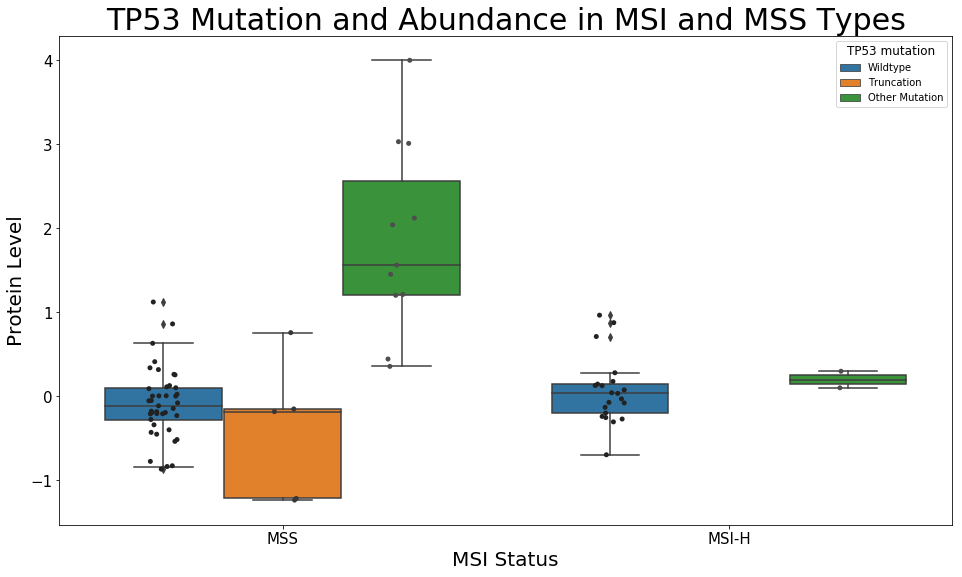

In [79]:
'''Format the data to generate a plot showing proteomic levels of truncation vs other mutation vs wildtype in MSI and MSS subtypes'''
a4_dims = (16, 9)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.boxplot(x="MSI_status", y=gene, hue="Mutation", data=genedf)
bx = sns.stripplot(data=genedf, x='MSI_status', y=gene, hue='Mutation', dodge=True, jitter=True, color='.3')
ax.tick_params(labelsize='15')
ax.set_xlabel('MSI Status', fontsize=20)
ax.set_ylabel('Protein Level',fontsize=20)
ax.set_title(gene + ' Mutation and Abundance in MSI and MSS Types', fontsize = 30)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:3],labels[0:3],title=gene + ' mutation', fontsize='10')
ax.get_legend().get_title().set_fontsize('12')

# CCND1

##### Look at the CCND1 gene, and the effect of its mutation on CCND1 protein abundance. Use the CPTAC compare mutations method to see how CCND1 protein abundance is affected by CCND1 mutation. Also include MSI Status (whether or not they have MSI subtype) in data.

In [80]:
'''Specify the what gene and protein we're looking at'''
gene = 'CCND1'
protein = 'CCND1'

'''Use the compare mutations function to examine protein abundance when the gene is mutated'''
genedf = CPTAC.compare_mutations(proteomics, protein, gene)
genedf['MSI_status'] = msi_status

##### Reformat the data to classify nonsense mutations, and frame shift insertions/deletions as truncation mutations. Classify all others as other mutation. Leave wildtype as is.

In [81]:
'''Classify mutations as either truncation or other mutation'''
genedf = genedf.replace({'Mutation': {'Frame_Shift_Del': 'Truncation',
                                      'Frame_Shift_Ins': 'Truncation',
                                      'Nonsense_Mutation': 'Truncation',
                                      'Missense_Mutation': 'Other Mutation',
                                      'In_Frame_Del':'Other Mutation'
                                     }})

##### Restrict our data to include only tumor patients, excluding non cancer patients

In [82]:
'''Look only at the tumor patients'''
genedf = genedf.loc[genedf['Patient_Type'] == 'Tumor']
genedf.loc[92] = [np.nan, 'Truncation', 'Tumor', 'MSS']
genedf = genedf.sort_values(by=['Mutation','MSI_status'], ascending=False)

##### Generate a plot illustrating proteomic levels of CCND1 in cases of truncation mutation, other mutation, and wildtype, for both MSI and MSS subtypes

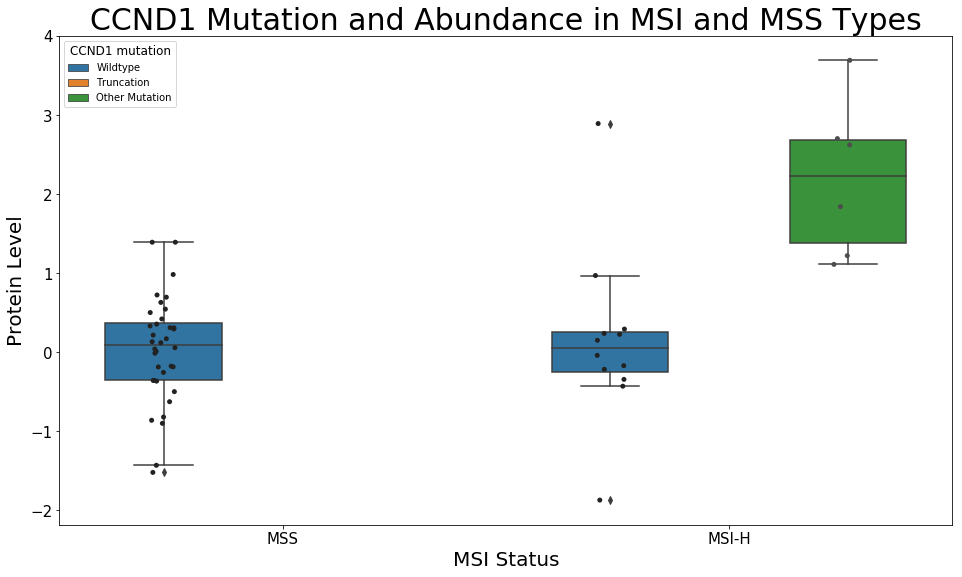

In [84]:
'''Format the data to generate a plot showing proteomic levels of truncation vs other mutation vs wildtype in MSI and MSS subtypes'''
a4_dims = (16, 9)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.boxplot(x="MSI_status", y=gene, hue="Mutation", data=genedf)
bx = sns.stripplot(data=genedf, x='MSI_status', y=gene, hue='Mutation', dodge=True, jitter=True, color='.3')
ax.tick_params(labelsize='15')
ax.set_xlabel('MSI Status', fontsize=20)
ax.set_ylabel('Protein Level',fontsize=20)
ax.set_title(gene + ' Mutation and Abundance in MSI and MSS Types', fontsize = 30)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:3],labels[0:3],title=gene + ' mutation', fontsize='10')
ax.get_legend().get_title().set_fontsize('12')